In [1]:
%pip install box-embeddings

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import numpy
from box_embeddings.parameterizations import BoxTensor, MinDeltaBoxTensor, SigmoidBoxTensor
from box_embeddings.modules.volume.volume import Volume
from box_embeddings.modules.intersection import Intersection
from box_embeddings.parameterizations.box_tensor import BoxFactory, BoxTensor
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [4]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

Types of boxes

In [3]:
from box_embeddings.parameterizations import BoxTensor, MinDeltaBoxTensor, SigmoidBoxTensor

tensor = torch.Tensor([[-1,-1],[2,2]])
tensor_1 = torch.Tensor([[-2,-2],[3,3]])
def create_box_tensor(tensor):
  box_tensor = BoxTensor(tensor)
  return box_tensor

def create_MinDelta_tensor(tensor):
  box_tensor = MinDeltaBoxTensor(tensor)
  return box_tensor

def create_Sigmoid_tensor(tensor):
  box_tensor = SigmoidBoxTensor(tensor)
  return box_tensor

def print_point(box_tensor):
  print("z: ",box_tensor.z)
  print("Z: ",box_tensor.Z)

box_tensor = create_box_tensor(tensor)
box_tensor_min = create_MinDelta_tensor(tensor)
box_tensor_sigmoid = create_Sigmoid_tensor(tensor)

box_tensor_1 = create_box_tensor(tensor_1)
box_tensor_min_1 = create_MinDelta_tensor(tensor_1)
box_tensor_sigmoid_1 = create_Sigmoid_tensor(tensor_1)

print("Box_normale")
print_point(box_tensor)
print("Box_min")
print_point(box_tensor_min)
print("Box_sigmoid")
print_point(box_tensor_sigmoid)

Box_normale
z:  tensor([-1., -1.])
Z:  tensor([2., 2.])
Box_min
z:  tensor([-1., -1.])
Z:  tensor([1.1269, 1.1269])
Box_sigmoid
z:  tensor([0.2689, 0.2689])
Z:  tensor([0.9129, 0.9129])


Types of volumes

In [4]:
from box_embeddings.modules.volume.volume import Volume
# torna valori in logaritmo
hard_volume = Volume(intersection_temperature=0, volume_temperature=0, log_scale=False)
soft_volume = Volume(intersection_temperature=0, volume_temperature=1.0, log_scale=False)
bessel = Volume(intersection_temperature=1.0, volume_temperature=1.0, log_scale=False)
print("box normale")
print("hard", hard_volume(box_tensor))
print("soft", soft_volume(box_tensor))
print("bessel", bessel(box_tensor))

print("box min")
print("hard", hard_volume(box_tensor_min))
print("soft", soft_volume(box_tensor_min))
print("bessel", bessel(box_tensor_min))

print("box sigmoid")
print("hard", hard_volume(box_tensor_sigmoid))
print("soft", soft_volume(box_tensor_sigmoid))
print("bessel", bessel(box_tensor_sigmoid))


box normale
hard tensor(9.)
soft tensor(9.2939)
bessel tensor(3.9689)
box min
hard tensor(4.5238)
soft tensor(5.0156)
bessel tensor(1.6724)
box sigmoid
hard tensor(0.4146)
soft tensor(1.1365)
bessel tensor(0.2210)


Types of intersection

In [5]:
from box_embeddings.modules.intersection import Intersection

# restituisce un box di intersezione 
hard_intersection = Intersection(intersection_temperature=0)
gumbel_intersection = Intersection(intersection_temperature=1.0)

print("intersezione stesso box normale")
volume = hard_volume(hard_intersection(box_tensor, box_tensor))
print_point(box_tensor)
print("hard_volume, hard_int ", volume)
volume = hard_volume(gumbel_intersection(box_tensor, box_tensor))
print("hard_volume, gumbel_int ", volume)
volume = soft_volume(hard_intersection(box_tensor, box_tensor))
print("soft_volume, hard_int ", volume)
volume = soft_volume(gumbel_intersection(box_tensor, box_tensor))
print("soft_volume, gumbel_int ", volume)
volume = bessel(hard_intersection(box_tensor, box_tensor))
print("bessel_volume, hard_int ", volume)
volume = bessel(gumbel_intersection(box_tensor, box_tensor))
print("bessel_volume, gumbel_int ", volume)

intersezione stesso box normale
z:  tensor([-1., -1.])
Z:  tensor([2., 2.])
hard_volume, hard_int  tensor(9.)
hard_volume, gumbel_int  tensor(2.6040)
soft_volume, hard_int  tensor(9.2939)
soft_volume, gumbel_int  tensor(3.2232)
bessel_volume, hard_int  tensor(3.9689)
bessel_volume, gumbel_int  tensor(0.9005)


In [6]:
print("intersezione stesso box min")
volume = hard_volume(hard_intersection(box_tensor_min, box_tensor_min))
print_point(box_tensor_min)
print("hard_volume, hard_int ", volume)
volume = hard_volume(gumbel_intersection(box_tensor_min, box_tensor_min))
print("hard_volume, gumbel_int ", volume)
volume = soft_volume(hard_intersection(box_tensor_min, box_tensor_min))
print("soft_volume, hard_int ", volume)
volume = soft_volume(gumbel_intersection(box_tensor_min, box_tensor_min))
print("soft_volume, gumbel_int ", volume)
volume = bessel(hard_intersection(box_tensor_min, box_tensor_min))
print("bessel_volume, hard_int ", volume)
volume = bessel(gumbel_intersection(box_tensor_min, box_tensor_min))
print("bessel_volume, gumbel_int ", volume)

intersezione stesso box min
z:  tensor([-1., -1.])
Z:  tensor([1.1269, 1.1269])
hard_volume, hard_int  tensor(4.5238)
hard_volume, gumbel_int  tensor(0.5485)
soft_volume, hard_int  tensor(5.0156)
soft_volume, gumbel_int  tensor(1.2781)
bessel_volume, hard_int  tensor(1.6724)
bessel_volume, gumbel_int  tensor(0.2576)


In [7]:
print("intersezione stesso box sigmoid")
volume = hard_volume(hard_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print_point(box_tensor_sigmoid)
print("hard_volume, hard_int ", volume)
volume = hard_volume(gumbel_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("hard_volume, gumbel_int ", volume)
volume = soft_volume(hard_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("soft_volume, hard_int ", volume)
volume = soft_volume(gumbel_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("soft_volume, gumbel_int ", volume)
volume = bessel(hard_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("bessel_volume, hard_int ", volume)
volume = bessel(gumbel_intersection(box_tensor_sigmoid, box_tensor_sigmoid))
print("bessel_volume, gumbel_int ", volume)

intersezione stesso box sigmoid
z:  tensor([0.2689, 0.2689])
Z:  tensor([0.9129, 0.9129])
hard_volume, hard_int  tensor(0.4146)
hard_volume, gumbel_int  tensor(0.)
soft_volume, hard_int  tensor(1.1365)
soft_volume, gumbel_int  tensor(0.1516)
bessel_volume, hard_int  tensor(0.2210)
bessel_volume, gumbel_int  tensor(0.0195)


In [11]:
def extract_embeddings(boxes):
        list_box = []
        list_box.append(boxes.z.data.tolist())
        list_box.append(boxes.Z.data.tolist())
        return list_box

In [86]:
from torch.nn.modules.loss import L1Loss
from box_embeddings.modules.regularization import l2_side_regularizer
box_vol = Volume(volume_temperature=0, intersection_temperature=0)
box_int = Intersection(intersection_temperature=0.0001)
import math
from torch import nn 

def rounded_box_vol(arg):
  #return torch.exp(box_vol(arg)).item()
  return torch.exp((box_vol(arg))).item()

def good_print(text, var):
  template = '|{:30}: {:.4f}|'.format(text, var)
  print(template)


def train(box_target, box_pos, box_neg_2, box_neg, optimizer, epochs=1):
  best_loss = float('inf')
  best_box_target = None
  best_box_pos = None
  best_box_neg = None
  volume_target = []
  volume_positive = []
  volume_negative_2 = []
  volume_negative = []
  volume_int_positive = []
  volume_int_negative_2 = []
  volume_int_negative = []

  target_list = []
  context_list = []
  context_list_2 = []
  negative_list = []
  
  print('|{:-^38}|'.format(''))

  for e in range(epochs):

    good_print('epoch (before backward):', e)
    print('|{:*^38}|'.format(''))
    good_print("volume parola target: ", rounded_box_vol(box_target))
    volume_target.append(rounded_box_vol(box_target))
    good_print("volume parola positive: ", rounded_box_vol(box_pos))
    volume_positive.append(rounded_box_vol(box_pos))
    good_print("volume parola negative_2: ", rounded_box_vol(box_neg_2))
    volume_negative_2.append(rounded_box_vol(box_neg_2))
    good_print("volume parola negative: ", rounded_box_vol(box_neg))
    volume_negative.append(rounded_box_vol(box_neg))
    print('|{:-^38}|'.format(''))
    good_print("volume int target-negative: " , rounded_box_vol(box_int(box_target, box_neg)))
    volume_int_negative.append(rounded_box_vol(box_int(box_target, box_neg)))
    good_print("volume int target-negative_2: " , rounded_box_vol(box_int(box_target, box_neg_2)))
    volume_int_negative_2.append(rounded_box_vol(box_int(box_target, box_neg_2)))
    good_print("volume int target-positive: " , rounded_box_vol(box_int(box_target, box_pos)))
    volume_int_positive.append(rounded_box_vol(box_int(box_target, box_pos)))
    

    target_list.append(extract_embeddings(box_target))
    context_list.append(extract_embeddings(box_pos))
    context_list_2.append(extract_embeddings(box_neg_2))
    negative_list.append(extract_embeddings(box_neg))
    
    optimizer.zero_grad() 
    


    #loss = - ( box_vol(box_int(box_pos, box_target)) - (box_vol(box_target)+box_vol(box_pos)) )
    #loss += ( box_vol(box_int(box_neg, box_target)) - (box_vol(box_target)+box_vol(box_neg)) )
    #loss += ( box_vol(box_int(box_neg_2, box_target)) -  (box_vol(box_target)+ box_vol(box_neg_2)) ) 

    loss = - ( box_vol(box_int(box_pos, box_target)) - ( box_vol(box_pos) + box_vol(box_target))  )
    loss += ( box_vol(box_int(box_neg, box_target)) -  ( box_vol(box_neg)+ box_vol(box_target)) )
    loss += ( box_vol(box_int(box_neg_2, box_target))  - (box_vol(box_neg_2) + box_vol(box_target)) ) 
    
     
    loss.backward()
    optimizer.step()

    

    print(len(context_list_2))

    if best_loss > loss.item():
            best_loss = loss.item()
            best_box_neg = box_neg
            best_box_pos = box_pos
            best_box_target = box_target
    print('|{:-^38}|'.format(''))

    good_print("Loss: ",loss.item())
    good_print("pos: ", ( box_vol(box_int(box_pos, box_target)) - (box_vol(box_target)+box_vol(box_pos)) ).item()) 
    good_print("neg: ", ( box_vol(box_int(box_neg, box_target)) - (box_vol(box_target)+box_vol(box_neg)) ).item()) 
    good_print("neg_2 :", ( box_vol(box_int(box_neg_2, box_target)) -  (box_vol(box_target)+box_vol(box_neg_2)) ).item())
    
    
    
    print('|{:*^38}|'.format(''))

    #plt.plot(lst_iter, lst_loss, '-b', label='loss')
    #plt.plot(lst_iter, lst_acc, '-r', label='accuracy')
  plt.figure(0, figsize=(10,6))
  x = [i for i in range(epochs)]
  plt.plot(x, volume_target, label = "Volume target")
  plt.plot(x, volume_positive, label = "Volume positive")
  plt.plot(x, volume_negative_2, label = "Volume neg_2")
  plt.plot(x, volume_negative, label = "Volume negative")
  plt.legend()
  plt.show()
  plt.figure(1, figsize=(10,6))
  plt.plot(x, volume_int_negative, label = "Volume int-neg")
  plt.plot(x, volume_int_positive, label = "Volume int-pos")
  plt.plot(x, volume_int_negative_2, label = "Volume int-neg_2")
  plt.legend()
  plt.show()

  return target_list, context_list, context_list_2, negative_list

In [27]:
# Initialization
data_x = torch.tensor([[-2, -2], [+2., +3.]], requires_grad=True)
box_target = SigmoidBoxTensor(data_x)

data_y = torch.tensor([[1, -3], [+1., +1]], requires_grad=True)
box_positive = SigmoidBoxTensor(data_y)

data_k = torch.tensor([[-3., -3.0], [-2., -1.5]], requires_grad=True)
box_negative_2 = SigmoidBoxTensor(data_k)

data_z = torch.tensor([[-2., -2.5], [-4., -4.]], requires_grad=True)
box_negative = SigmoidBoxTensor(data_z)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


volume red  0.6509181261062622
volume purple  0.019731955602765083
volume green 0.1369180977344513
volume black  0.00026332621928304434
volume itersezione green-red  0.6506941914558411
volume intersezione purple-red  0.004260668531060219
volume intersezione black-red  1.5772889560815577e-15


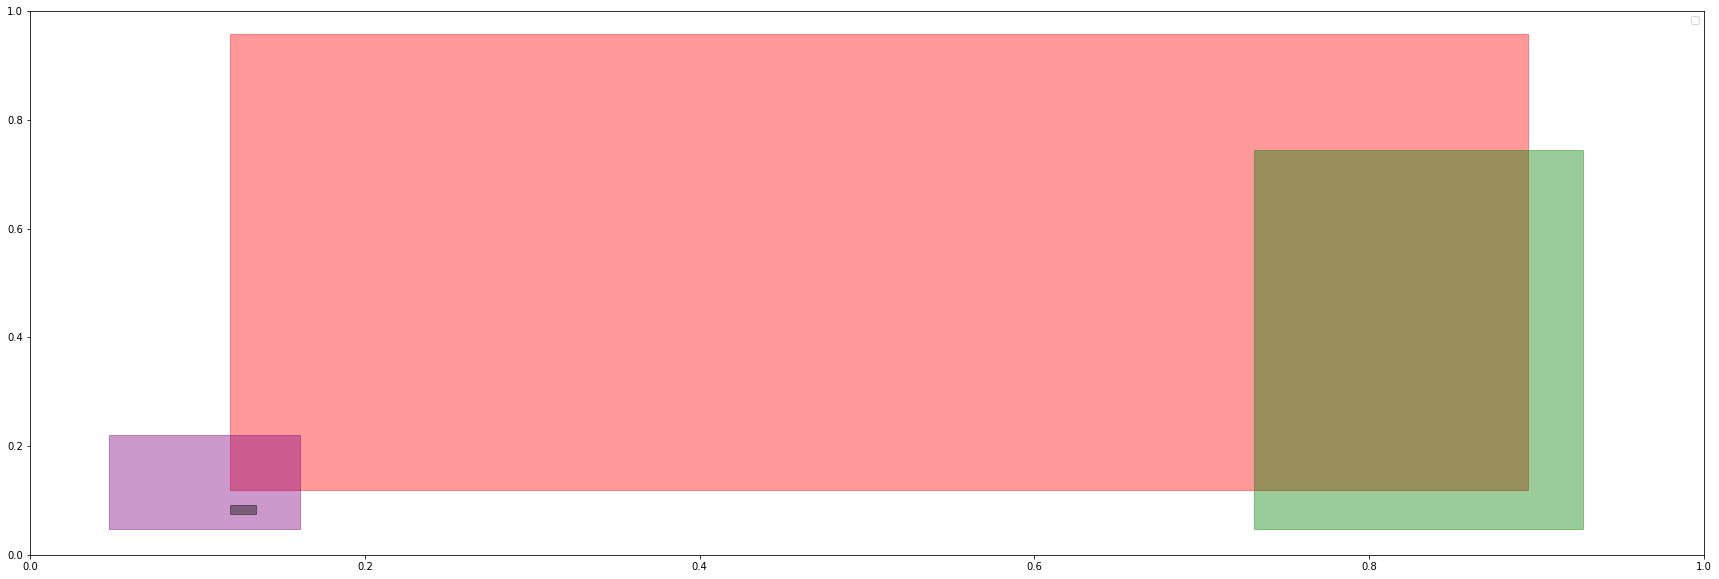

In [28]:
import matplotlib.patches as patches

volume_ = Volume(volume_temperature=0, intersection_temperature=0)
intersection_ = Intersection(intersection_temperature=0.0001)

print("volume red ", torch.exp(volume_(box_target)).item())
print("volume purple ",torch.exp(volume_(box_negative_2)).item())
print("volume green", torch.exp(volume_(box_positive)).item())
print("volume black ", torch.exp(volume_(box_negative)).item())

volumes = volume_(intersection_(box_target, box_target))
volumes_2 = volume_(intersection_(box_negative_2, box_target))
volumes_3 = volume_(intersection_(box_negative, box_target))

print("volume itersezione green-red ", torch.exp(volumes).item())
print("volume intersezione purple-red ", torch.exp(volumes_2).item())
print("volume intersezione black-red ", torch.exp(volumes_3).item())


target_list = extract_embeddings(box_target)
context_list = extract_embeddings(box_positive)
negative_list_2 = extract_embeddings(box_negative_2)
negative_list = extract_embeddings(box_negative)


def load_boxes(box, color):

  rect = patches.Rectangle((box[0][0], box[0][1]), 
                              box[1][0] - box[0][0], 
                              box[1][1] - box[0][1], 
                              facecolor=color, edgecolor = color, alpha=0.4)
      
  
  return rect

rect_target = load_boxes(target_list, "red")
rect_positive = load_boxes(context_list, "green")
rect_negative = load_boxes(negative_list, "black")
rect_negative_2 = load_boxes(negative_list_2, "purple")


fig, ax = plt.subplots(figsize=(30, 10))
plt.xlim([0, +1])
plt.ylim([0, +1])


ax.add_patch(rect_target)
ax.add_patch(rect_positive)
ax.add_patch(rect_negative_2)
ax.add_patch(rect_negative)
ax.legend()

|--------------------------------------|
|epoch (before backward):      : 0.0000|
|**************************************|
|volume parola target:         : 0.6509|
|volume parola positive:       : 0.1369|
|volume parola negative_2:     : 0.0197|
|volume parola negative:       : 0.0003|
|--------------------------------------|
|volume int target-negative:   : 0.0000|
|volume int target-negative_2: : 0.0043|
|volume int target-positive:   : 0.1024|
1
|--------------------------------------|
|Loss:                         : -26.6539|
|pos:                          : 0.3594|
|neg:                          : -51.1875|
|neg_2 :                       : -54.5904|
|**************************************|
|epoch (before backward):      : 1.0000|
|**************************************|
|volume parola target:         : 0.5996|
|volume parola positive:       : 0.1776|
|volume parola negative_2:     : 0.0085|
|volume parola negative:       : 0.0003|
|--------------------------------------|
|volume 

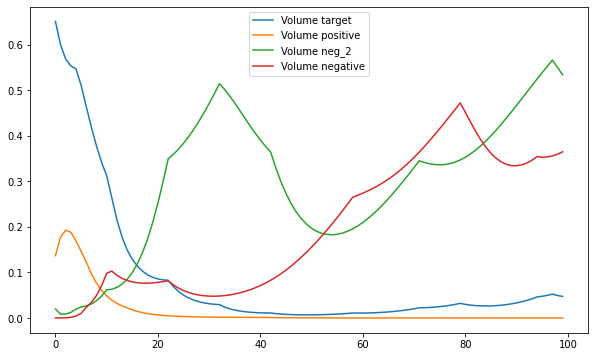

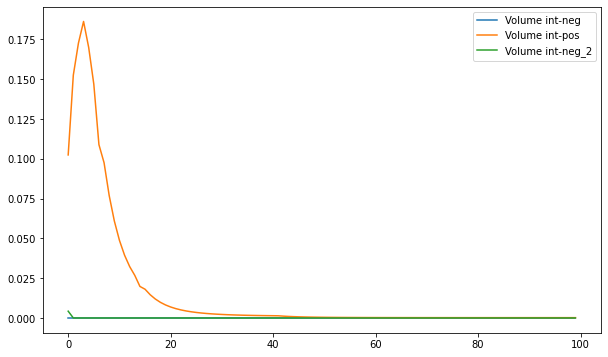

In [29]:
# Training function
learning_rate = 0.5

# Train
seed_everything(12345)
optimizer = torch.optim.Adam([data_x, data_y, data_k, data_z], lr=learning_rate)
epochs = 100
target_list, context_list, context_list_2, negative_list = train(box_target, box_positive, box_negative_2, box_negative, optimizer, epochs=epochs)


In [30]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, interactive
from copy import copy
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

def load_boxes(myboxes, ty, color):

  import matplotlib._color_data as mcd
  import matplotlib.patches as mpatch
  colors = [name for name in mcd.CSS4_COLORS
            if "xkcd:" + name in mcd.XKCD_COLORS]

  list_ = []
  for i,box in enumerate(myboxes):
    list_epoch = []
    rect = patches.Rectangle((box[0][0], box[0][1]), 
                            box[1][0] - box[0][0], 
                            box[1][1] - box[0][1], 
                            facecolor=color, edgecolor = color, lw=3, label=ty, alpha=0.4)
    
    list_.append(rect)
  return list_

list_targets = load_boxes(target_list, "target", "red")
print(len(list_targets))
list_contexts_pos = load_boxes(context_list, "positive", "green")
list_contexts_pos_2 = load_boxes(context_list_2, "negative_2", "brown")
list_contexts_neg = load_boxes(negative_list, "negative", "black")

def f2(epoch = (0, epochs-1, 1)):

    fig, ax = plt.subplots(figsize=(30, 10))
    plt.xlim([0, +1])
    plt.ylim([0, +1])
   
    new_c=copy(list_targets[epoch])
    new_pos=copy(list_contexts_pos[epoch])
    new_pos_2=copy(list_contexts_pos_2[epoch])
    new_neg=copy(list_contexts_neg[epoch])
      
    ax.add_patch(new_c)
    ax.add_patch(new_pos)
    ax.add_patch(new_pos_2)
    ax.add_patch(new_neg)
    ax.legend()


interact(f2);

100


interactive(children=(IntSlider(value=49, description='epoch', max=99), Output()), _dom_classes=('widget-inter…

In [113]:
from box_embeddings.parameterizations.box_tensor import BoxFactory
from box_embeddings.modules import BoxEmbedding
from box_embeddings.initializations import UniformBoxInitializer
import torch
from torch import nn 

global use_cuda
use_cuda = torch.cuda.is_available()
device = 0 if use_cuda else -1

class BoxModel(nn.Module):
    def __init__(self, emb_size, embedding_dim, box_vol, box_int):
        super(BoxModel, self).__init__()

        self.use_cuda = torch.cuda.is_available()
        self.device = torch.device("cuda" if self.use_cuda else "cpu")
        self.initializer = UniformBoxInitializer(dimensions=embedding_dim, num_boxes=emb_size, box_type_factory=BoxFactory("sigmoid_from_vector"),
        minimum=0., maximum=1, delta_min=0.9, delta_max=1)
        self.embedding_dim = embedding_dim
        self.vocab_size = emb_size
        self.embeddings_word = BoxEmbedding(self.vocab_size, self.embedding_dim, box_factory=BoxFactory("sigmoid_from_vector"), box_initializer=self.initializer)
        self.embeddings_context = BoxEmbedding(self.vocab_size, self.embedding_dim, box_factory=BoxFactory("sigmoid_from_vector"), box_initializer=self.initializer)
        #self.embeddings_word = BoxEmbedding(self.vocab_size, self.embedding_dim)
        #self.embeddings_context = BoxEmbedding(self.vocab_size, self.embedding_dim)
        self.box_vol = box_vol
        self.box_int = box_int

box_vol = Volume(volume_temperature=0, intersection_temperature=0)
box_int = Intersection(intersection_temperature=0.001)

model = BoxModel(4, 2, box_vol, box_int)

boxes_target = model.embeddings_word.all_boxes
boxes_context = model.embeddings_context.all_boxes


In [114]:
import matplotlib.patches as patches
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib._color_data as mcd
import random
import plotly.graph_objects as go

colors = [name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS]


def extract_embeddings(boxes):
        list_box = []
        list_box.append(boxes.z.data.tolist())
        list_box.append(boxes.Z.data.tolist())
        rect = patches.Rectangle((list_box[0][0], list_box[0][1]), 
                    list_box[1][0] - list_box[0][0], 
                    list_box[1][1] - list_box[0][1])
        
        rx, ry = rect.get_xy()
        cx = rx + rect.get_width()/2.0
        cy = ry + rect.get_height()/2.0

        return rect, [list_box[0][0], list_box[0][1], list_box[1][0], list_box[1][1]], cx, cy

lis_all = list(range(4))
center_x = []
center_y = []
words = []
all_rect = []
points = []

for i in lis_all:
    emb = boxes_target[i]
    rect, p, cx, cy = extract_embeddings(emb)
    all_rect.append(rect)
    points.append(p)
    center_x.append(cx)
    center_y.append(cy)
    words.append(str(i))

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=center_x,
        y=center_y,
        mode="text",
        text=words,
        textposition="middle center",
        textfont=dict(color="black"),
    )
)

fig.update_xaxes(range=[0, 1])
fig.update_yaxes(range=[0, 1])

for i, point in enumerate(points):
  color = "#%06x" % random.randint(0, 0xFFFFFF)
  fig.add_shape(type="rect",
      x0=point[0], y0=point[1], x1=point[2], y1=point[3],
      line=dict(color=color),
  )

fig.update_layout(margin=dict(l=80, r=80, t=80, b=80),)


In [ ]:
import matplotlib.patches as patches

volume_ = Volume(volume_temperature=0, intersection_temperature=0)
intersection_ = Intersection(intersection_temperature=0.0001)

print("volume red ", torch.exp(volume_(box_target)).item())
print("volume purple ",torch.exp(volume_(box_negative_2)).item())
print("volume green", torch.exp(volume_(box_positive)).item())
print("volume black ", torch.exp(volume_(box_negative)).item())

volumes = volume_(intersection_(box_target, box_target))
volumes_2 = volume_(intersection_(box_negative_2, box_target))
volumes_3 = volume_(intersection_(box_negative, box_target))

print("volume itersezione green-red ", torch.exp(volumes).item())
print("volume intersezione purple-red ", torch.exp(volumes_2).item())
print("volume intersezione black-red ", torch.exp(volumes_3).item())


target_list = extract_embeddings(box_target)
context_list = extract_embeddings(box_positive)
negative_list_2 = extract_embeddings(box_negative_2)
negative_list = extract_embeddings(box_negative)


def load_boxes(box, color):

  rect = patches.Rectangle((box[0][0], box[0][1]), 
                              box[1][0] - box[0][0], 
                              box[1][1] - box[0][1], 
                              facecolor=color, edgecolor = color, alpha=0.4)
      
  
  return rect

rect_target = load_boxes(target_list, "red")
rect_positive = load_boxes(context_list, "green")
rect_negative = load_boxes(negative_list, "black")
rect_negative_2 = load_boxes(negative_list_2, "purple")


fig, ax = plt.subplots(figsize=(30, 10))
plt.xlim([0, +1])
plt.ylim([0, +1])


ax.add_patch(rect_target)
ax.add_patch(rect_positive)
ax.add_patch(rect_negative_2)
ax.add_patch(rect_negative)
ax.legend()